In [2]:
import gzip
import numpy as np

#from keras.models import Sequential
#from keras.layers import Dense
#from keras.utils import to_categorical

ImportError: Something is wrong with the numpy installation. While importing we detected an older version of numpy in ['C:\\anaconda3\\lib\\site-packages\\numpy']. One method of fixing this is to repeatedly uninstall numpy until none is found, then reinstall this version.

In [13]:
#Funktion zum Laden der einzelnen Bilder
def open_images(filename):
    #öffnen der gzip-Datein
    with gzip.open(filename, "rb") as file:
        #Laden aller daten
        data = file.read()
        #Schreiben der Daten in ein Numpy Array und Rückgabe des Arrays
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1,28,28)\
            .astype(np.float32)
    
def open_labels(filename):
    with gzip.open(filename,"rb") as file:
        data = file.read()
        return np.frombuffer(data,dtype=np.uint8,offset=8)

#erstellen der Daten arrays
X_train = open_images("../Kursmaterialien/data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../Kursmaterialien/data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../Kursmaterialien/data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../Kursmaterialien/data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [14]:
model = Sequential()

#Hinzufuegen eines Layers mit Dense
#100 = Anzahl der Neuronen (frei gewaehlt)
#784 = Anzahl der Pixel pro Bild
model.add(Dense(100, activation="sigmoid", input_shape=(784,))) # Hidden - Layer
model.add(Dense(10,activation="sigmoid")) # Output - Layer - Die 10 repräsentiert die Anzahl der Ausgänge

#1. Parameter = Optimierung der Gewichtung über SGD (Stochastic Gradient Decent - Gradientenabstiegsverfahren)
#2. Parameter = Standardwert
model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [15]:
X_train.reshape(60000,784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
model.fit(
    X_train.reshape(60000,784),
    y_train,
    epochs=10, #Anzahl wie häufig die Epochen durchlaufen werden sollen
    batch_size=1000 #Nach 1000 Bildern werden die Gewichte aktualisiert
)

Epoch 1/10
60000/60000 [==============================] - 1s 11us/step - loss: 2.1418 - accuracy: 0.2142
Epoch 2/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.9123 - accuracy: 0.4619: 0s - loss: 1.9938 
Epoch 3/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.7150 - accuracy: 0.6047
Epoch 4/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.5250 - accuracy: 0.6708
Epoch 5/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.3644 - accuracy: 0.7054
Epoch 6/10
60000/60000 [==============================] - 1s 8us/step - loss: 1.2273 - accuracy: 0.7236
Epoch 7/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.1250 - accuracy: 0.7372
Epoch 8/10
60000/60000 [==============================] - 1s 9us/step - loss: 1.0435 - accuracy: 0.7477
Epoch 9/10
60000/60000 [==============================] - 1s 8us/step - loss: 0.9752 - accuracy: 0.7571
Epoch 10/10
60000/60000 [==================

In [17]:
# -1 bedeutet bei numpy, dass alle Daten aus dem Array genommen werden sollen
model.evaluate(X_test.reshape(-1,784), y_test)

10000/10000 [==============================] - 0s 21us/step


[0.9061742719650269, 0.757099986076355]

In [18]:
#Vorher:
# - ja / nein
# 10%     90%

model.predict(X_test.reshape(-1,784))

array([[0.01260734, 0.0107647 , 0.01380661, ..., 0.06862549, 0.0559147 ,
        0.5542837 ],
       [0.02119517, 0.01026951, 0.24367893, ..., 0.01289221, 0.00991752,
        0.00609857],
       [0.05982616, 0.6986617 , 0.0247108 , ..., 0.01057847, 0.01042228,
        0.02579831],
       ...,
       [0.05483755, 0.00740292, 0.00823385, ..., 0.02633623, 0.21813323,
        0.01208154],
       [0.05669089, 0.50962037, 0.01545247, ..., 0.01636796, 0.01113941,
        0.03199712],
       [0.01036371, 0.0139068 , 0.01329704, ..., 0.1928434 , 0.07384874,
        0.0518176 ]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


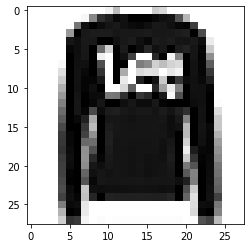

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1],cmap="gray_r")
plt.show()

In [30]:
pred = model.predict(X_test.reshape(-1,784))

In [31]:
pred[1]

array([0.02119517, 0.01026951, 0.24367893, 0.01465313, 0.10936671,
       0.00785222, 0.06811959, 0.01289221, 0.00991752, 0.00609857],
      dtype=float32)

In [32]:
np.argmax(pred[1])

2